### Import things

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./CSVs/novels_clean.csv')

### I'm going to drop the book Passenger to Frankfurt for now because the authors had identified it as an outlier and also dropped it for during their analysis for the following reasons:
>A linear regression on the decline in vocabulary with age approaches significance [F(1,14) =4
3.95, p = .066], and is highly significant when the outlier, Frankfurt, is removed (see discussion below) [F(1,13) = 9.80, p < .01]

>Outlier. Passenger to Frankfurt has the largest vocabulary of all the works we analyzed.
Unlike Christie’s other works, it is a thriller, not a detective mystery, conceived, written,
and researched in her early to mid 70s. Subtitled “An extravaganza”, it draws on books
by political thinkers that she requested of her publishers. On receiving her manuscript,
they were doubtful about bringing it out because it differed so much from her detective
fiction. Much of the vocabulary in Passenger to Frankfurt comes from her reliance on
these sources. We therefore exclude it as an outlier from our tests for vocabulary richness. Nonetheless, we observe that it was not an outlier with regard to indefinite words.

In [3]:
df = df[df['book_title'] != 'passenger to frankfurt'].reset_index(drop=True)

### Look at correlations

<AxesSubplot:>

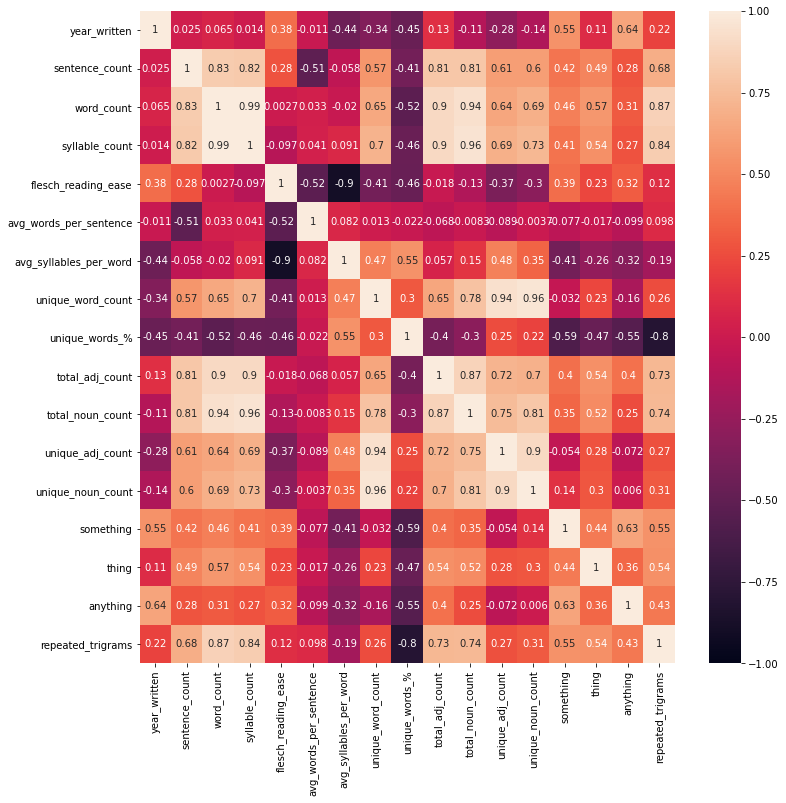

In [4]:
plt.figure(figsize=[12,12])
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

### Replicating the Lancashire & Hirst, 2009 paper

The authors found that the "richness" Christie's novels declined, repeated phrase types as measured by n-grams increased, and usage of indefinite words increased as she aged.

Text(0.5, 1.0, 'Word Count Over the Years')

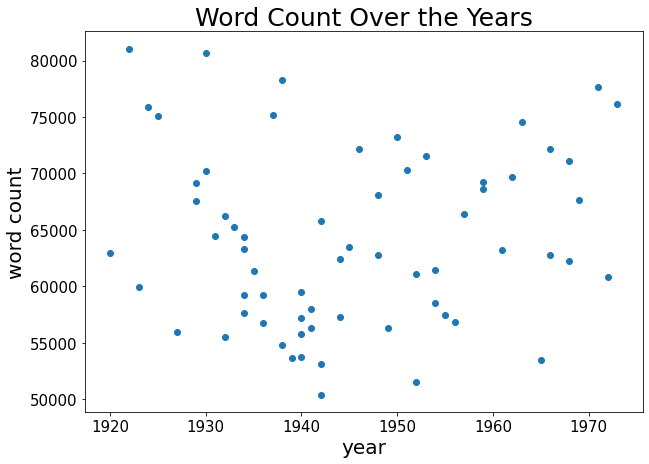

In [5]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['word_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('word count', size = 20)
plt.title('Word Count Over the Years', size = 25)

Text(0.5, 1.0, 'Unique Word Count Over the Years')

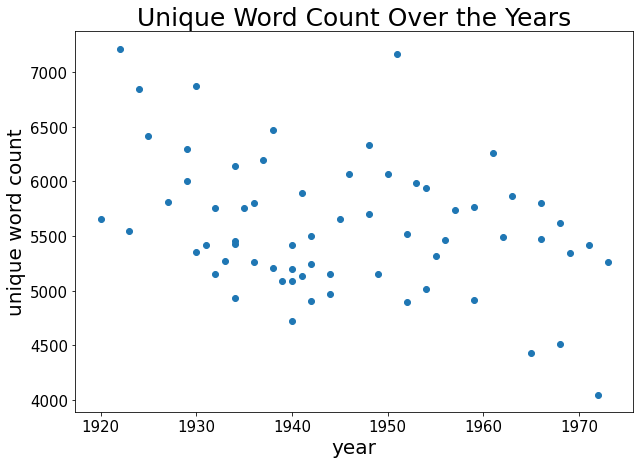

In [6]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['unique_word_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('unique word count', size = 20)
plt.title('Unique Word Count Over the Years', size = 25)

Text(0.5, 1.0, '% Unique Words Over the Years')

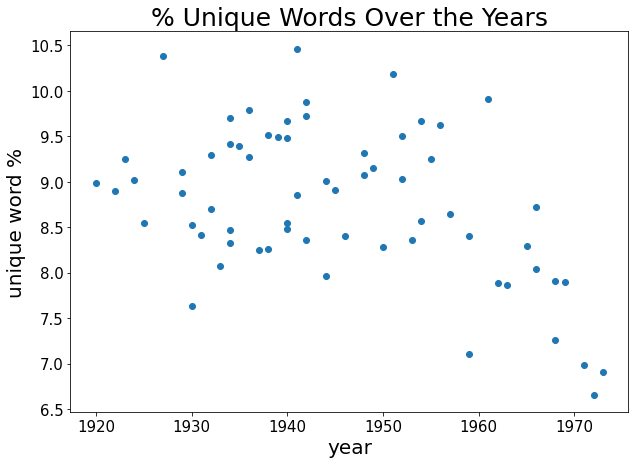

In [7]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['unique_words_%'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('unique word %', size = 20)
plt.title('% Unique Words Over the Years', size = 25)

In [8]:
df.columns

Index(['book_title', 'book_text', 'year_written', 'sentence_count',
       'word_count', 'syllable_count', 'flesch_reading_ease',
       'avg_words_per_sentence', 'avg_syllables_per_word', 'stemmed_text',
       'unique_word_count', 'unique_words_%', 'total_adj_count',
       'total_noun_count', 'adj_word_list', 'noun_word_list',
       'unique_adj_count', 'unique_noun_count', 'something', 'thing',
       'anything', 'repeated_trigrams'],
      dtype='object')

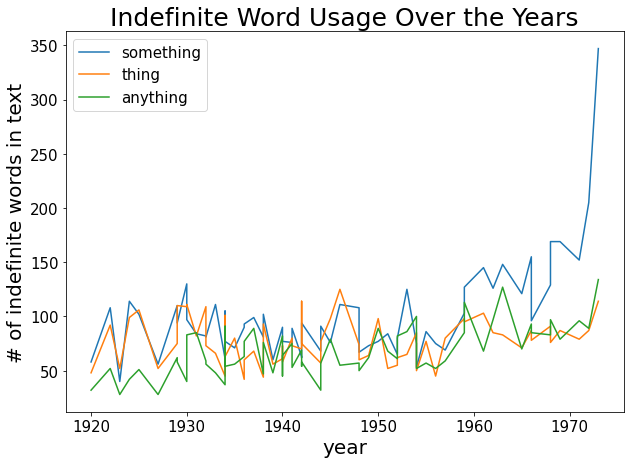

In [9]:
plt.figure(figsize=[10,7])
plt.plot(df['year_written'],df[['something', 'thing', 'anything']])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Indefinite Word Usage Over Time')
plt.xlabel('year', size = 20)
plt.ylabel('# of indefinite words in text', size = 20)
plt.title('Indefinite Word Usage Over the Years', size = 25)
plt.legend(('something', 'thing', 'anything'), loc="upper left", prop={'size': 15})

Text(0, 0.5, 'Repeated Trigrams')

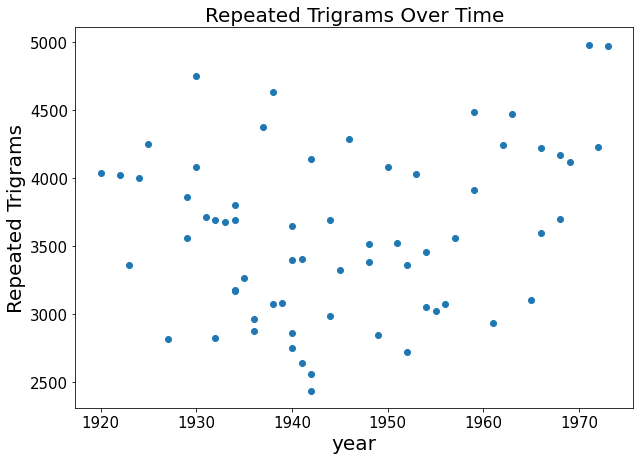

In [10]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['repeated_trigrams'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Repeated Trigrams Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Repeated Trigrams', size = 20)

Text(0, 0.5, 'Sentence Count')

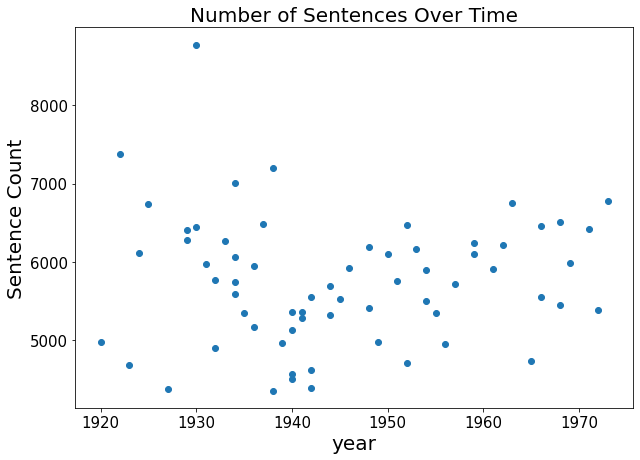

In [11]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['sentence_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Number of Sentences Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Sentence Count', size = 20)

Text(0, 0.5, 'average words per sentence')

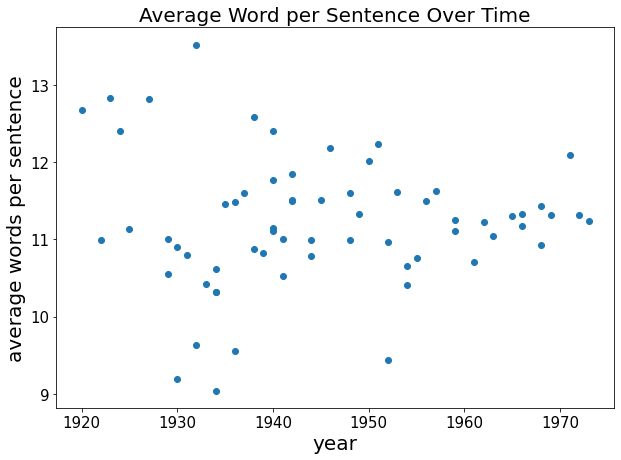

In [12]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['avg_words_per_sentence'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Average Word per Sentence Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('average words per sentence', size = 20)

Text(0, 0.5, 'Flesch Reading Ease Score')

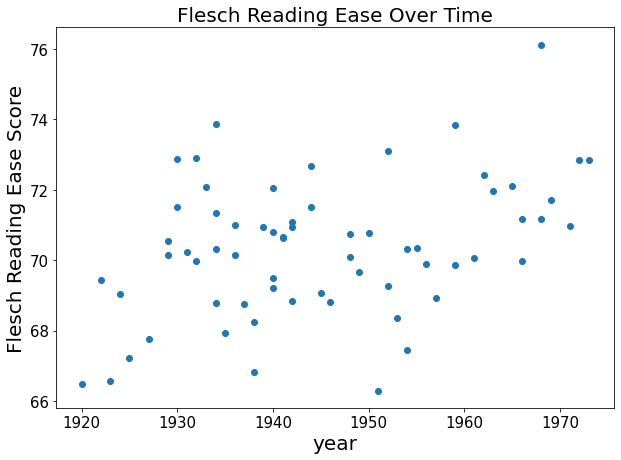

In [13]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['flesch_reading_ease'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Flesch Reading Ease Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Flesch Reading Ease Score', size = 20)

Text(0, 0.5, 'Adjective Count')

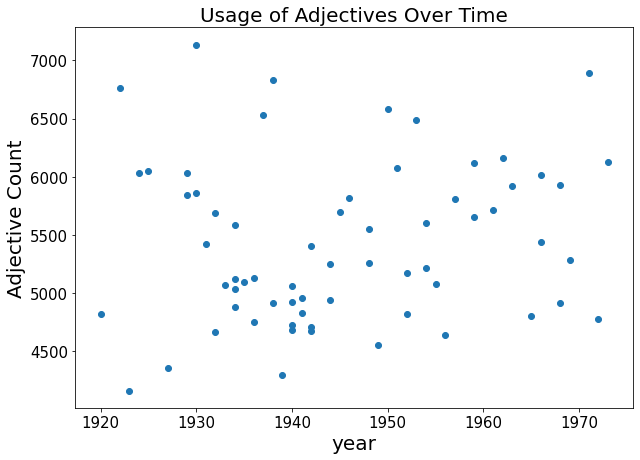

In [14]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['total_adj_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Usage of Adjectives Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Adjective Count', size = 20)

Text(0, 0.5, 'Noun Count')

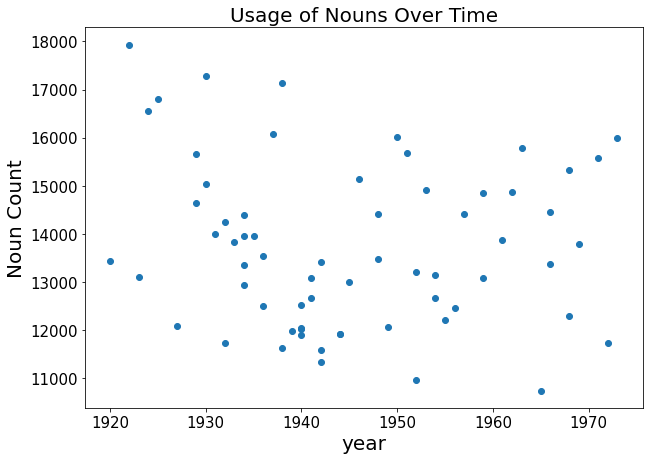

In [15]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['total_noun_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Usage of Nouns Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Noun Count', size = 20)

Text(0, 0.5, 'Unique Adjectives Count')

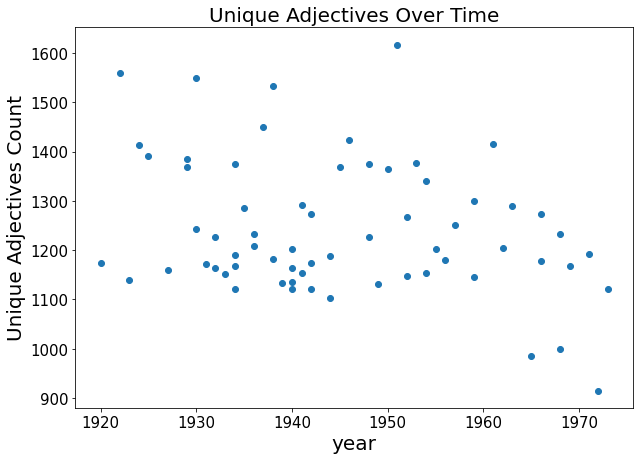

In [16]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['unique_adj_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Unique Adjectives Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Unique Adjectives Count', size = 20)

Text(0, 0.5, 'Unique Nouns Count')

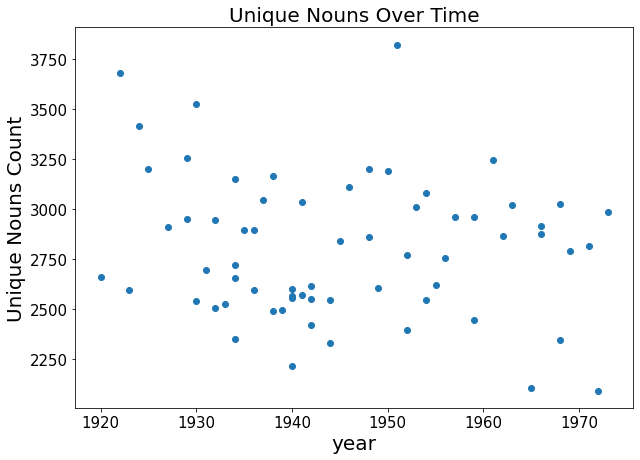

In [17]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['unique_noun_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Unique Nouns Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Unique Nouns Count', size = 20)

Text(0, 0.5, 'Average Syllables per Word')

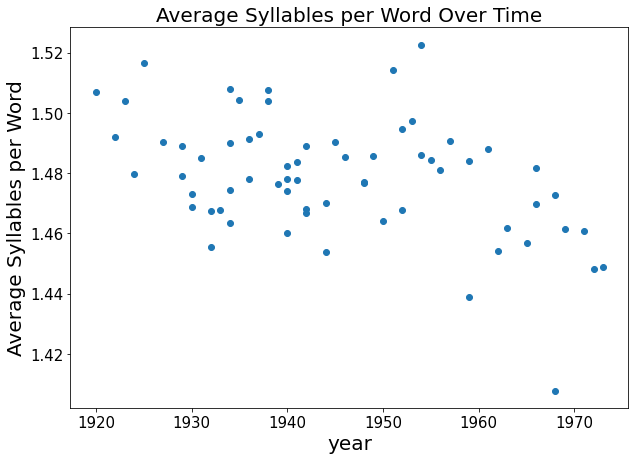

In [18]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['avg_syllables_per_word'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Average Syllables per Word Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Average Syllables per Word', size = 20)